## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [33]:
%matplotlib inline
!pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [73]:
%matplotlib inline

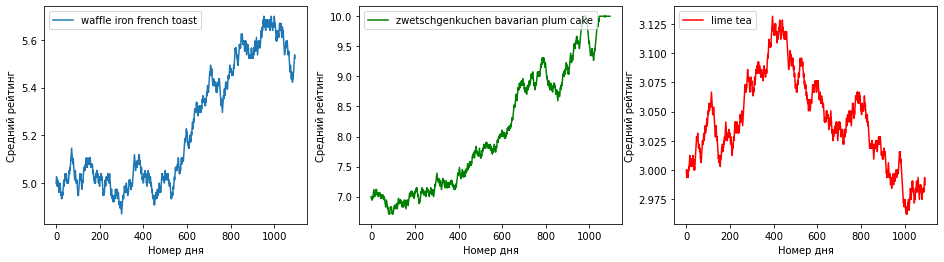

In [22]:
a = np.load('average_ratings.npy')

fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4) )

rate0 = [r for r in a[0]]
days0 = [d for d in range(len(a[0]))]

rate1 = [r1 for r1 in a[1]]
days1 = [d1 for d1 in range(len(a[1]))]

rate2 = [r for r in a[2]]
days2 = [d for d in range(len(a[2]))]

ax0.plot(days0,rate0, label = 'waffle iron french toast') 
ax0.set_xlabel("Номер дня")
ax0.set_ylabel("Средний рейтинг")
ax0.legend(loc="upper left")

ax1.plot(days1,rate1, 'g',label = 'zwetschgenkuchen bavarian plum cake') 
ax1.set_xlabel("Номер дня")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(loc="upper left")

ax2.plot(days2,rate2,'r', label = 'lime tea') 
ax2.set_xlabel("Номер дня")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc="upper left")

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [6]:
data = pd.date_range(start='01/01/2019', end='30/12/2021')

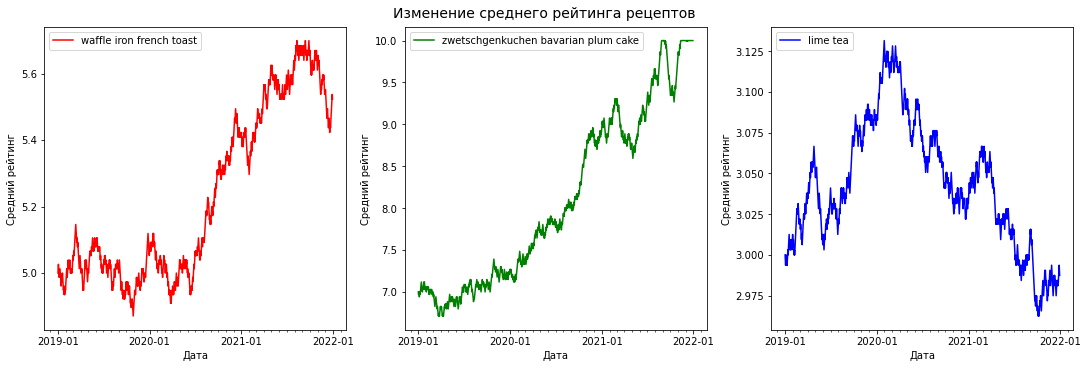

In [42]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5), layout='constrained')
fig.suptitle("Изменение среднего рейтинга рецептов", fontsize=14)

def m_p(ax2):
    ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
    ax2.xaxis.set_minor_locator(mdates.MonthLocator())
    ax2.set_xlabel("Дата")
    ax2.set_ylabel("Средний рейтинг")
    ax2.legend(loc="upper left")

ax0.plot(data, rate0, 'r', label='waffle iron french toast')
m_p(ax0)

ax1.plot(data,rate1, 'g',label = 'zwetschgenkuchen bavarian plum cake')
m_p(ax1)

ax2.plot(data,rate2,'b', label = 'lime tea')
m_p(ax2)

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

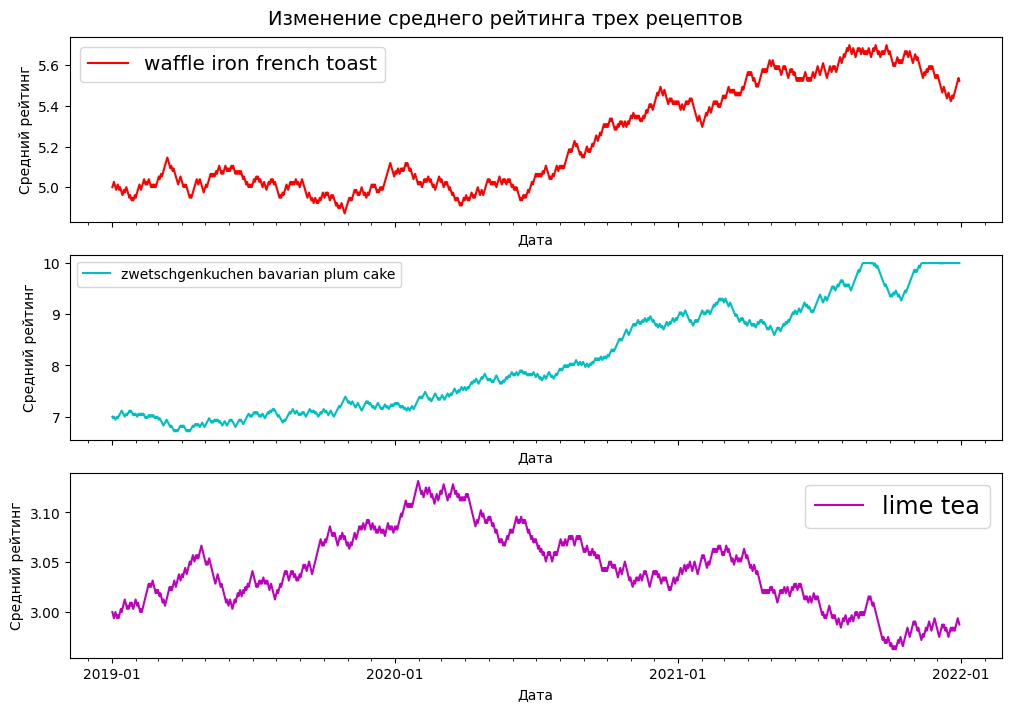

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 7), layout='constrained', sharex='col')
fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize=14)

ax1.plot(data, rt1, 'r', label='waffle iron french toast')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(fontsize='x-large')

ax2.plot(data, rt2, 'c', label="zwetschgenkuchen bavarian plum cake")
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc="upper left")

ax3.plot(data, rt3, 'm', label="lime tea")
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.set_xlabel("Дата")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(fontsize='xx-large')

fig.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [10]:
recipes = pd.read_csv('recipes_sample.csv')
reviews= pd.read_csv('reviews_sample.csv')
recipes.head()


,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [32]:
reviews.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

<AxesSubplot:title={'center':'Размеры групп рецептов'}, ylabel='size'>

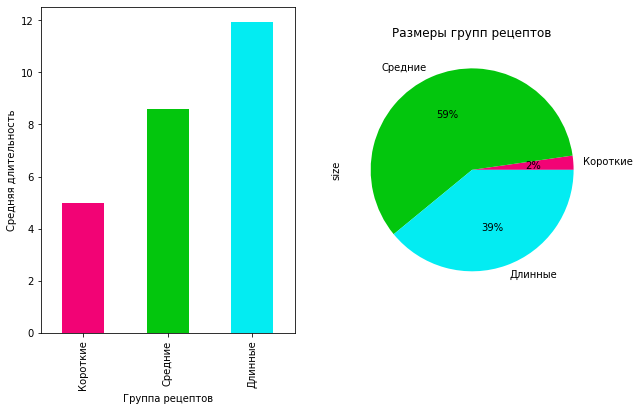

In [12]:

recipes.loc[recipes['minutes']<5, 'duration'] = 'Короткие'
recipes.loc[(recipes['minutes']>=5) & (recipes['minutes'] < 50), 'duration'] = 'Средние'
recipes.loc[recipes['minutes']>=50, 'duration'] = 'Длинные'

grouped_data = recipes.groupby('duration')['n_steps'].aggregate(['mean', 'size']).sort_values(by='mean')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

grouped_data['mean'].plot(kind='bar', color =['#f20375', '#03c60d', '#03ecf2'],  ylabel = 'Средняя длительность', xlabel= 'Группа рецептов',ax=ax1)
grouped_data['size'].plot(kind='pie', autopct='%1.0f%%',colors = ['#f20375', '#03c60d', '#03ecf2'],
title='Размеры групп рецептов', ax = ax2)


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

<AxesSubplot:ylabel='Frequency'>

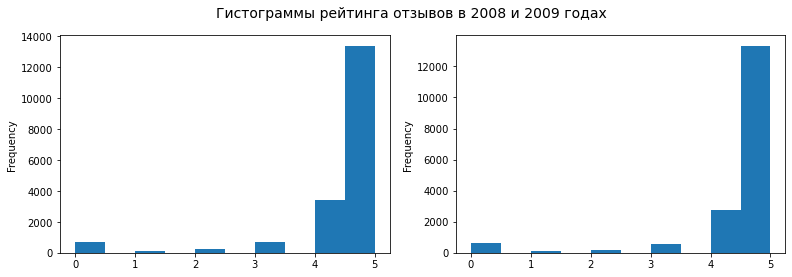

In [154]:

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13,4))

fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах", fontsize=14)

reviews[reviews['date'].str.contains('2008')]['rating'].plot.hist(ax = ax1)
reviews[reviews['date'].str.contains('2009')]['rating'].plot.hist(ax = ax2)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

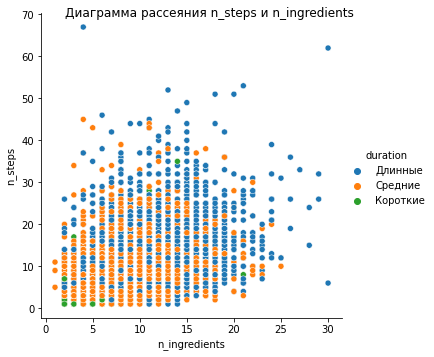

In [31]:
sns.relplot( x="n_ingredients", y="n_steps", hue = 'duration',data = recipes)
plt.suptitle('Диаграмма рассеяния n_steps и n_ingredients');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

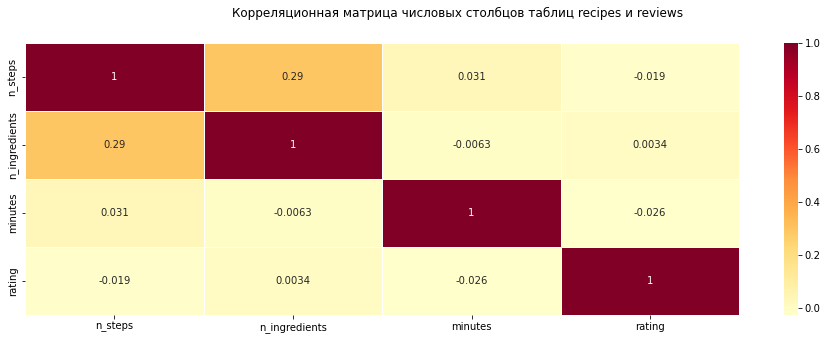

In [84]:
_2tab = pd.merge(reviews,recipes, left_on='recipe_id', right_on = 'id')
plt.figure(figsize = (16,5))
sns.heatmap(_2tab[['n_steps','n_ingredients','minutes','rating']].corr(), linewidths=0.5, cmap='YlOrRd', annot = True)
plt.suptitle('Корреляционная матрица числовых столбцов таблиц recipes и reviews');